# Solutions to Putnam 1985

https://kskedlaya.org/putnam-archive/1985.pdf

## A1
> Determine, with proof, the number of ordered triples $(A_1,A_2,A_3)$ of sets which have the properties that
> (i) $A_1 \cup A_2 \cup A_3 = [10]$
> (ii) $A_1 \cap A_2 \cap A_3 = \emptyset$
> Express your answer in the form $2^a3^b5^c7^d$ where $a,b,c,d$ are nonnegative integers.

We define $\psi(k,n)$ to be the number of $k$-tuples whose union is $[n]$ and whose intersection is $\emptyset$.
Of course $\psi(3,10)$ is the answer we desire, and which we will derive using properties of $\psi$.

The following identities hold:
1. $\psi(k,0) = 1$, trivial
2. $\psi(k,n+1) = \sum_{j=1}^{k-1} \binom{k}{j} \psi(k,n)$, by taking a $k$-tuple from $\psi(k,n)$ and adding the element $n+1$ to $j$ of the tuple entries. In order to satisfy (i) $j \neq 0$ and for (ii) we need $j \neq k$.
3. $\psi(k,n+1) = (2^k-2)\psi(k,n)$, by (2) and $\sum_{j=0}^k \binom{k}{j} = 2^k$.
4. $\psi(k,n+1) = (2^k-2)^n$, by induction step (3) and anchor (1).

Thus, with $n=10, k=3$
$$\psi(3,10) = (2^3-2)^{10} = 6^{10} = 2^{10} 3^{10}$$

In [1]:
# SANITY CHECK
%display latex

def phi_(k,n):
    i0 = set(range(n))
    u0 = set()
    def rec(k,i,u):
        if k <= 0:
            if u == i0 and not i:
                return 1
            else:
                return 0
        else:
            return sum([
                rec(k-1,
                    i.intersection(a),
                    u.union(a))
                for a in subsets(i0)
            ])
    return rec(k,i0,u0)

for _ in range(10):
    k = 1 + floor(5*random())
    n = floor(6*random())
    display("\phi("+str(k)+","+str(n)+\
            ") - (2^"+str(k)+"-2)^"+str(n)+\
            " = " + latex(phi_(k,n) - (2^k-2)^n))

\phi(3,3) - (2^3-2)^3 = 0

\phi(1,5) - (2^1-2)^5 = 0

\phi(5,4) - (2^5-2)^4 = 0

\phi(2,5) - (2^2-2)^5 = 0

\phi(3,0) - (2^3-2)^0 = 0

\phi(2,2) - (2^2-2)^2 = 0

\phi(4,4) - (2^4-2)^4 = 0

\phi(1,2) - (2^1-2)^2 = 0

\phi(3,4) - (2^3-2)^4 = 0

\phi(2,0) - (2^2-2)^0 = 0

## A3

> Let $d$ be a real number.
> For each integer $m \geq 0$, define a sequence $\{a_m(j)\},j=0,1,2,...$ by the condition
> \begin{align*}
 a_{m}(0) =& 2^{-m}d, \\
 a_{m}(j+1) =& (a_m(j))^2 + 2a_m(j), \quad j \geq 0
 \end{align*}
> Evaluate $\lim_{n\to \infty} a_n(n)$.

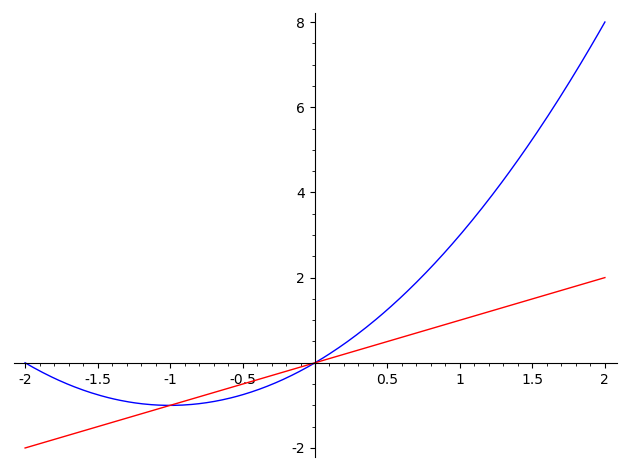

In [1]:
var('x')
plot(x^2+2*x,x,-2,2) + plot(x,x,-2,2,color="red")

Computing some values (because I can) it looks very much like exponential growth.
Claim: The limit is $e^d - 1$.

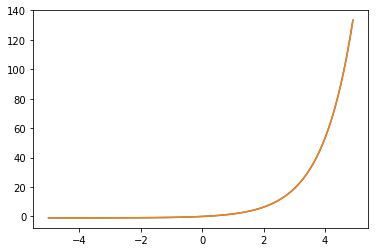

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def a(d,m,j):
    d = float(d)
    def go(m,j):
        if j <= 0:
            return 2^(-m)*d
        else:
            u = go(m,j-1)
            return u^2 + 2*u
    return go(m,j)
    
t = np.arange(-5,5,0.1)
plt.plot(t,[a(i,600,600) for i in t])
plt.plot(t,np.exp(t)-1)
plt.show()

## A4

In [4]:
[(k,3^k % 100) for k in range(21)]

[(0, 1),
 (1, 3),
 (2, 9),
 (3, 27),
 (4, 81),
 (5, 43),
 (6, 29),
 (7, 87),
 (8, 61),
 (9, 83),
 (10, 49),
 (11, 47),
 (12, 41),
 (13, 23),
 (14, 69),
 (15, 7),
 (16, 21),
 (17, 63),
 (18, 89),
 (19, 67),
 (20, 1)]

$3^{20} = 1 \mod 100$

Hence $3^x \mod 100 = 3^{x \mod 20} = 3^{x \mod 100}$.
It thus suffices to consider the sequence $a_n \mod 100$.

In [5]:
3^3 % 100 == 27
3^27 % 100 == 3^7 % 100 == 87
3^87 % 100 == 3^7 % 100 == 87

True

## A5

Let $\delta^a$ denote the function $x\in \mathbb{R} \mapsto \exp(iax)$.
The following laws hold:

1. $\delta^a \delta^b = \delta^{a+b}$
2. $(\delta^a)^{-1} = \delta^{-a}$
3. $2\cos(ax) = (\delta^{-a} + \delta^{a})(x)$
4. $2\sin(ax) = i(\delta^{-a} - \delta^{a})(x)$

We can derive formulas for products of cosines:
Let $a_1,...,a_n$ be a sequence of real numbers.

$$\prod_{k=1}^n \cos(a_k x)
= 2^{-n}\prod_{k=1}^n \left(\delta^{-a_k} + \delta^{a_k}\right)
= 2^{-n}\sum_{s\in \{-1,1\}^n} \delta^{\sum_{k=1}^n s_k a_k}
$$ 

Pairing up $s$ with $-s$ we can write this as
$$ ...
= 2^{1-n}\sum_{s\in \{-1,1\}^n} \cos\left(x\sum_{k=1}^n s_k a_k\right)
$$

All the summands vanish after applying the integral operator $\int_0^{2\pi}\cdots\,dx$, except when there exist $s$ for which $\sum_{k=1}^n s_k a_k = 0$.

Let $V = \left\{ s \in \{-1,1\}^n \mid \sum_{k=1}^n s_k a_k = 0\right\}$

Then
$$\int_0^{2\pi} \sum_{s\in \{-1,1\}^n} \cos\left(x\sum_{k=1}^n s_k a_k\right) \,dx
= \int_0^{2\pi} \sum_{s\in V} \cos\left(0\right) \,dx
= |V| 2\pi
$$


For our problem consider $n=m$ and $a_k = k$ for all $1 \leq k \leq m$ as well as
$$V =V_m = \left\{ s \in \{-1,1\}^m \mid \sum_{k=1}^m k s_k  = 0\right\}$$

Then
$$ I_m = 2^{2-m}\pi|V_m|$$

**Case 1.** If $m(m+1) \equiv 2 \mod 4 \iff (m \mod 4) \in \{\bar 1, \bar 2\}$, then
$$ \sum_{k=1}^m k s_k \equiv \frac{(m+1)m}{2} \equiv 1 \mod 2$$
so $V_m = \emptyset$.

**Case 2.** However, if $m(m+1) \equiv 0 \iff (m \mod 4) \in \{\bar 0, \bar 3\}$, we further distinguish:

**Case 2a.** $m\equiv 0 \mod 4$. Just pair up $k$ with $m-k+1$ to get an even number of summands $m+1$, which cancel each other out, e.g. $1,2,3,4 \to (1+4),(2+3) \to (1+4)-(2+3) = 0$.

**Case 2b.** $m\equiv 3 \mod 4$. Ignore the summand $m$ and pair up $k$ with $m-k$ to get an odd number of summands $m$. The left-over summand makes $m$ makes it an even number of summands, e.g. $1,2,3,4,5,6,7 \to (1+6),(2+5),(3+4),7 \to (1+6) + (2+5) - (3+4) - 7 = 0$.

In [6]:
%display latex
for m in range(1,11):
    if m%4 in [0,3]:
        display("I_{"+str(m)+"} = "+latex(0))
    else:
        display("I_{"+str(m)+"} \\neq "+latex(0))

I_{1} \neq 0

I_{2} \neq 0

I_{3} = 0

I_{4} = 0

I_{5} \neq 0

I_{6} \neq 0

I_{7} = 0

I_{8} = 0

I_{9} \neq 0

I_{10} \neq 0

# A6

## B5

$$ u = t^{1/2}, du = t^{-1/2}dt/2 $$

$$ \int_0^\infty e^{-1985(t+t^{-1})} t^{-1/2}\,dt
= 2\int_0^\infty e^{-1985(u^2+u^{-2} - 2 + 2)}\,du
= 2e^{-2\cdot 1985} \int_0^\infty e^{-1985(1/u - u)^2} \,du
= e^{-2\cdot 1985} \int_{-\infty}^\infty e^{-1985(1/u - u)^2} \,du$$

$$ s = 1/u - u, ds = -(1 + u^2)/u^2$$

In [7]:
var('x')
integral(exp(-1985*(x^2/4+4*x^(-2))),x,0,oo)

1/1985*sqrt(1985)*sqrt(pi)*e^(-3970)

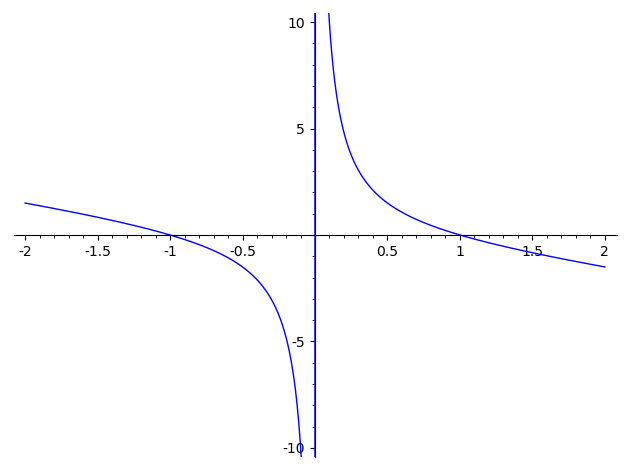

In [8]:
plot(1/x-x/1,x,-2,2,ymin=-10,ymax=10)

## B6